<a href="https://colab.research.google.com/github/Junyoungs7/Colab_ML_DL_Python/blob/main/VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import models, transforms

print("pyTorch Version: ", torch.__version__)
print("Torchvision Version: ", torchvision.__version__)

pyTorch Version:  1.10.0+cu111
Torchvision Version:  0.11.1+cu111


In [ ]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
from torchvision.transforms.transforms import ToTensor
class BaseTransform():
  def __init__(self, resize, mean, std):
    self.base_transform = transforms.Compose([
        transforms.Resize(resize),
        transforms.CenterCrop(resize),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])

  def __call__(self, img):
    return self.base_transform(img)

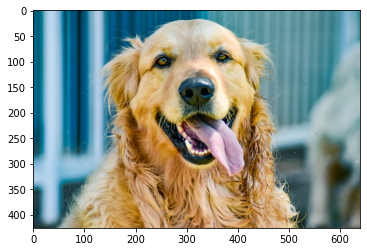

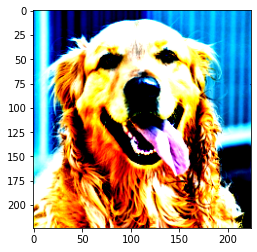

In [ ]:
image_file_path = '/content/drive/MyDrive/ColabNotebooks/Pytorch_sorce/source/ex_source/1_image_classification/data/goldenretriever-3724972_640.jpg'
img = Image.open(image_file_path)

plt.imshow(img)
plt.show()

resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)

img_transformed = img_transformed.numpy().transpose((1,2,0))
img_transformed = np.clip(img_transformed, 0 , 1)
plt.imshow(img_transformed)
plt.show()

In [ ]:
import os
import urllib.request

data_dir = '/content/drive/MyDrive/ColabNotebooks/Pytorch_sorce/source/ex_source/1_image_classification/data/'
if not os.path.exists(data_dir):
  os.mkdir(data_dir)

url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"

save_path = os.path.join(data_dir, "imagenet_class_index.json")

if not os.path.exists(save_path):
    urllib.request.urlretrieve(url, save_path)


In [ ]:
ILSVRC_class_index = json.load(open('/content/drive/MyDrive/ColabNotebooks/Pytorch_sorce/source/ex_source/1_image_classification/data/imagenet_class_index.json', 'r'))
ILSVRC_class_index

In [ ]:
class ILSVRCPredictor():
  def __init__(self, class_index):
    self.class_index = class_index

  def predict_max(self, out):
    maxid = np.argmax(out.detach().numpy())
    predicted_label_name = self.class_index[str(maxid)][1]

    return predicted_label_name

In [ ]:
ILSVRC_class_index = json.load(open('/content/drive/MyDrive/ColabNotebooks/Pytorch_sorce/source/ex_source/1_image_classification/data/imagenet_class_index.json', 'r'))

predictor = ILSVRCPredictor(ILSVRC_class_index)

image_file_path = '/content/drive/MyDrive/ColabNotebooks/Pytorch_sorce/source/ex_source/1_image_classification/data/goldenretriever-3724972_640.jpg'
img = Image.open(image_file_path)

transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
inputs = img_transformed.unsqueeze_(0)

out = net(inputs)
result = predictor.predict_max(out)

print("입력 화상의 예측 결과: ", result)

입력 화상의 예측 결과:  golden_retriever
